# Practical Drift Detection

PyTorch Tutorial Session @ LOD 2021

TorchDrift work with Luca Antiga, Lisa Lozza, Daniele Cortinovis from Orobix srl

# Industrial AI deployments

<img src="torchdrift-application-1_and_2.jpg" width=100% />
Images from Orobix srl (actual PyTorch deployment)

- Strong requirement for accuracy (false passes are particularly critical)
- Vision conditions can change, raw materials can change
- Performance can decrease silently

**Need to know if my model still works as expected**

# Why and what is drift?

Lots of elaborate concepts:
- Input drift, label drift, concept drift
- Regime change vs. gradual drift

But the key question always is:

**Do the assurances of model validation (still) apply in our deployment?**

# Can you trust your model to work?

<img src="trust_your_model.svg" width=100% />

Best guess: My model does OK as long as the data it sees is similar enough to the validation data.

# Two sample testing

General approach (following S. Rabanser et al., Failing Loudly: An empirical study of methods for detecting dataset shift).

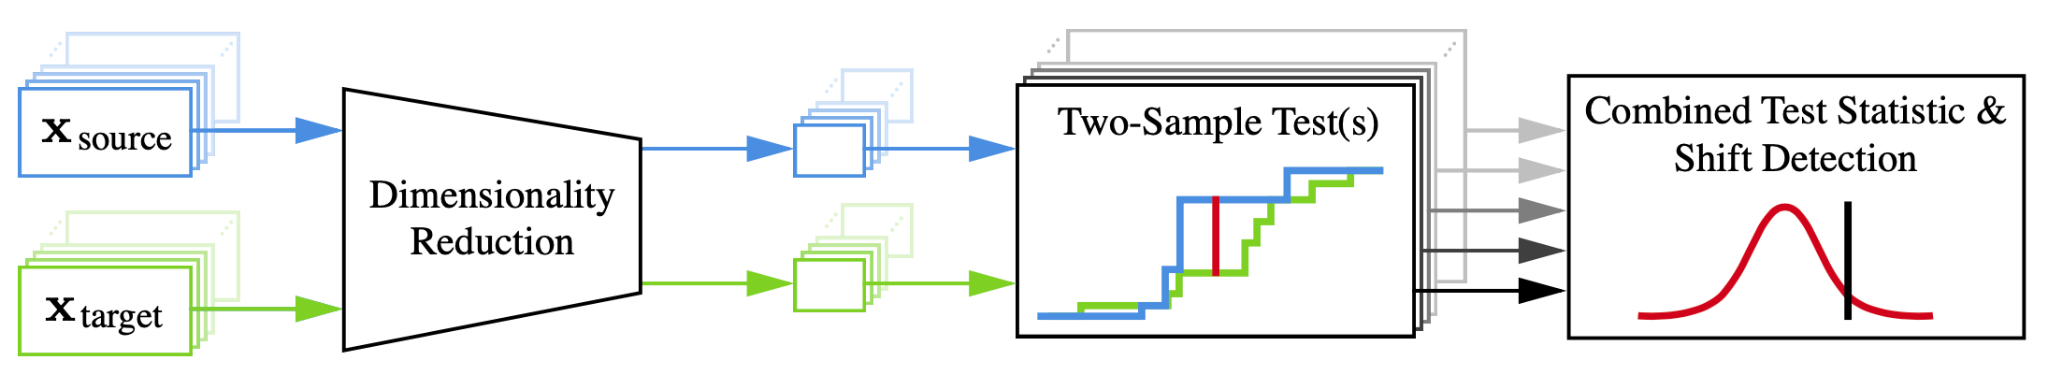
(image from S. Rabanser et al.)

- Reference sample ($x_{source}$)
- Test sample ($x_{target}$)

Statistical testing with null hypothesis: samples are from the same distribution

## More formally: Detecting drift

Two-sample testing

- _reference_ and _test distribution_
- At validation (or early production) time we draw some samples $X_1, ..., X_N$ from the _reference distribution_.
- In production, we then collect samples $Y_1, ..., Y_M$ which we consider to be drawn from the _test distribution_.

- statistical test with the null hypothesis that the reference distribution and the test distribution is the same. As we are using $N$ and $M$ samples rather than fixing one distribution to some analyticially know one, this is a two-sample test.

# Practical limitations

- Choice of features (raw inputs ... most hight-level features)

- Curse of dimensionality $\rightarrow$ typically have reduction step

- When to sound the alarm?

  Region in which the model does well might
  be different from what statistical testing
  identifies.
  
  Common: _Calibration_ with all its caveats.

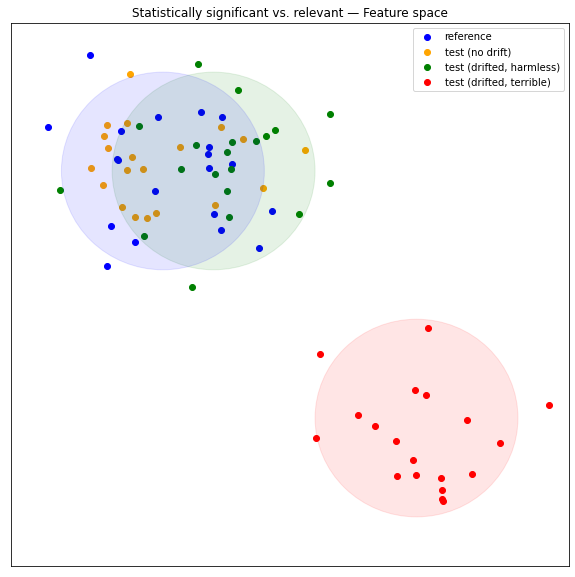

# If the dataset is more diverse than the reference

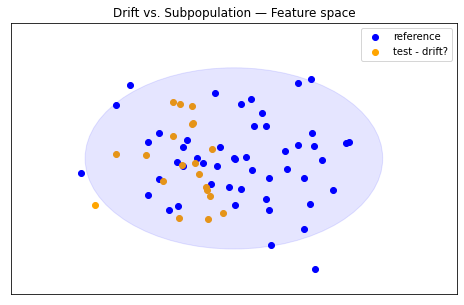

By the above definition this is drift.

But in typical applications, is is very common to see a reference set that is more diverse than the test data at any given moment.

... need a bridge between drift detection and outlier detection!


## MMD distance revisited

The Maximum Mean Discrepancy distance (A. Gretton et al.: A kernel two-sample test, JMLR 2012.) is induced by a kernel (as in RHKS). Given samples $X, Y$ it is

$$
MMD^2(X, Y) = \frac{1}{N^2} \sum_{i} \sum_{j} k(x_i, x_j)
           + \frac{1}{M^2} \sum_{i} \sum_{j} k(y_i, y_j)
           - 2 \frac{1}{N M} \sum_{i} \sum_{j} k(x_i, y_j).
$$
Note: all interactions present - unlike in Wasserstein Distance transport maps.

Introduce two vectors $w = (1/N)_{i=1..N}$ and $v = (1/M)_{j=1..M}$ and introduce the kernel matrices $K^X  = k(x_i, x_j)$, $K^Y = k(y_i, y_j)$ and $K^{XY} = k(x_i, y_j)$, we can rewrite this in matrix notation as

$$
MMD^2(X, Y) = w^T K^X w + v^T K^Y v - 2 w^T K^XY v.
$$

Typically more robust (due to lower sample complexity) than Wasserstein distance for statistical testing.

# Partial MMD

To get partial matches we can make $w$ more flexible and define the MMD distance as the minimum over $w$ such that a least $0 <\alpha \leq 1$ of the reference distirbution mass is matched:

$$\mathcal M = \{w \in R^N | 0 \leq w_i \leq \frac{1}{\alpha N}, \sum_i w_i = 1 \}.$$
We thus define the partial MMD distance as the minimum
$$
MMD^2_{\alpha} = \min_{w \in \mathcal M} w^T K^X w + v^T K^Y v - 2 w^T K^XY v.
$$


# Approximation

The QP optimization problem is somewhat expensive to solve...

Computing Wasserstein partial transport maps is a bit faster (with out of the box softare)

$\rightarrow$ Use the marginals of the transport plan as weights. A bit faster in practice. Yields a (not so good) upper bound but seems useful in practice.

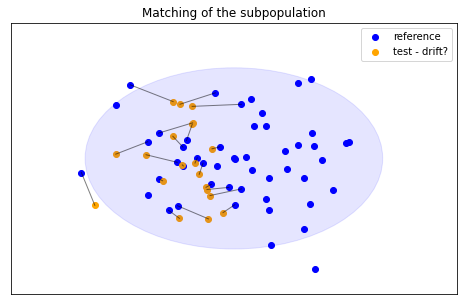

Matching helps inspection but also informs expectations (e.g. about performance).

# Live demo

...this was a tutorial right, so let us see a way to hook our library, **TorchDrift** <https://torchdrift.org/> into a deployed system.

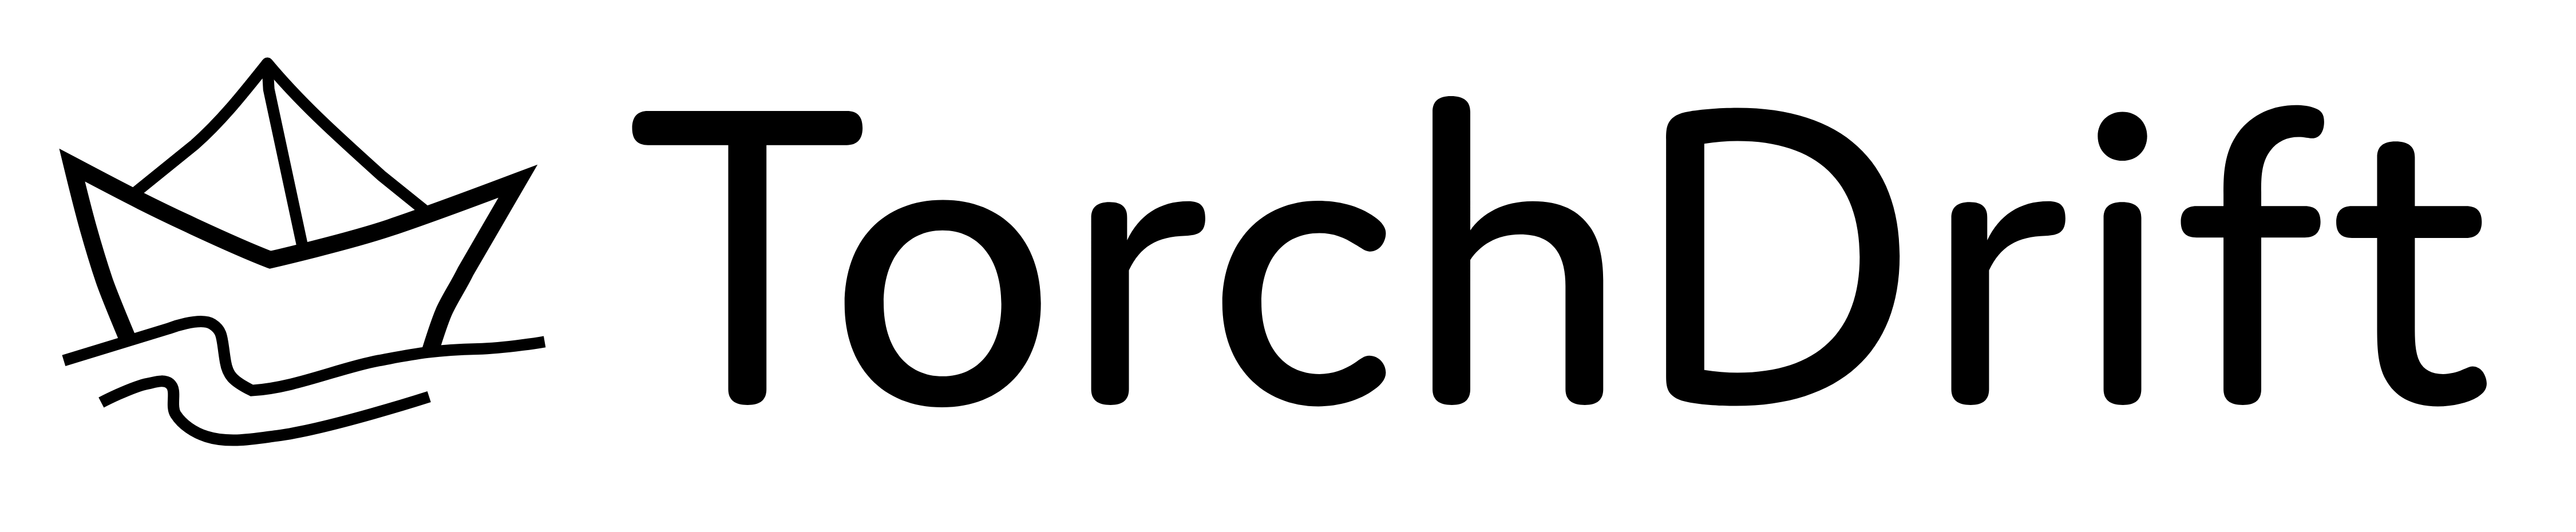

(And if are more into mathy writups, it is on arXiv: V.: Partial Wasserstein and Maximum Mean Discrepancy distances for bridging the gap between outlier detection and drift detection)